# Handwrittent Digit Classification

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0].shape

(28, 28)

In [10]:
y_train.shape

(60000,)

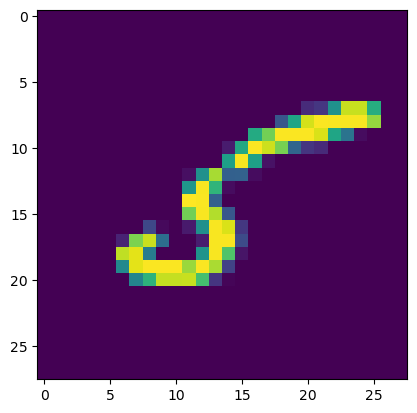

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[11])

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Feature Scalling

In [15]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model Training

In [31]:
model  = Sequential()

model.add(Flatten(input_shape=(28,28)))   # flattening the N-D Array into 1D Array
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [34]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2922 - val_loss: 0.1475
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1190 - val_loss: 0.1243
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0820 - val_loss: 0.0878
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0626 - val_loss: 0.0991
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0487 - val_loss: 0.0964
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0384 - val_loss: 0.0825
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0312 - val_loss: 0.1148
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0275 - val_loss: 0.1004
Epoch 9/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0214 - val_loss: 0.1068
Epoch 10/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.018

In [35]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred = y_prob.argmax(axis=1)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9779

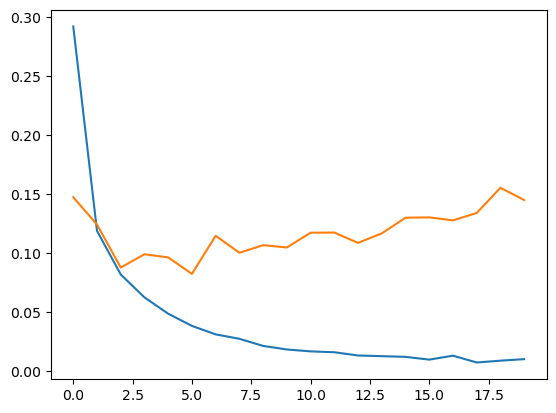

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

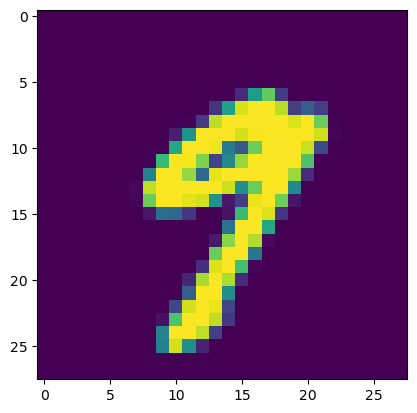

In [44]:
plt.imshow(X_test[20])

In [45]:
model.predict(X_test[20].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([9], dtype=int64)